#### ERA5 Hourly Data on Single Levels—is part of the Copernicus Climate Data Store (CDS)
Dataset from 1966 to present(2025-4-28)

In [2]:
import zipfile

# Path to your zip file
zip_file_path = 'dataset_weather.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files inside the zip
    zip_ref.printdir()
    
    # Extract all contents to a directory
    zip_ref.extractall('extracted_folder')

File Name                                             Modified             Size
reanalysis-era5-single-levels-timeseries-sfcs9bbofln.csv 2025-04-27 09:57:46     56944164
reanalysis-era5-single-levels-timeseries-wavzidyd6jj.csv 2025-04-27 09:57:50     29608120


## Code to read both csv files

In [4]:
import pandas as pd
import zipfile

# Path to your zip file
zip_file_path = 'dataset_weather.zip'

# Read both CSV files inside the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Read the first CSV file
    with zip_ref.open('reanalysis-era5-single-levels-timeseries-sfcs9bbofln.csv') as file1:
        df1 = pd.read_csv(file1)
    
    # Read the second CSV file
    with zip_ref.open('reanalysis-era5-single-levels-timeseries-wavzidyd6jj.csv') as file2:
        df2 = pd.read_csv(file2)

# Display first few rows of both dataframes
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
            valid_time       u10       v10        d2m        t2m         msl  \
0  1966-01-08 00:00:00  0.167664  4.068848  295.96410  298.87402  101169.690   
1  1966-01-08 01:00:00  0.324326  4.016586  295.96080  298.74690  101088.375   
2  1966-01-08 02:00:00  0.384232  3.952469  295.99136  298.55120  101022.690   
3  1966-01-08 03:00:00  0.368317  4.033676  295.95123  298.47656  100992.440   
4  1966-01-08 04:00:00  0.301758  4.101944  296.04437  298.32910  100937.375   

         sst          sp        tp  latitude  longitude  
0  300.06665  101165.734  0.000059       0.0        0.0  
1  300.06665  101083.440  0.000048       0.0        0.0  
2  300.06665  101018.470  0.000119       0.0        0.0  
3  300.06665  100987.984  0.000162       0.0        0.0  
4  300.06665  100932.700  0.000101       0.0        0.0  

DataFrame 2:
            valid_time        mwd       mwp       swh  latitude  longitude
0  1966-01-08 00:00:00  183.29135  6.593778  1.009988       0.0      

## Analysis of DataFrames:

DataFrame 1:

This dataset contains weather-related variables, including:

valid_time: The timestamp for each observation (hourly data).

u10 and v10: Wind components (u and v) at 10 meters above the surface, representing wind speed in the east-west and north-south directions, respectively.

d2m: Dew point temperature in Kelvin.

t2m: Temperature at 2 meters above the surface in Kelvin.

msl: Mean sea level pressure in Pascals.

sst: Sea surface temperature in Kelvin.

sp: Surface pressure in Pascals.

tp: Total precipitation in millimeters.

latitude and longitude: Geographical location of the observation (both are 0.0 in the data, which may indicate missing values or placeholder values).


DataFrame 2:

This dataset contains wave-related data:

valid_time: The timestamp for each observation (hourly data).

mwd: Mean wave direction in degrees.

mwp: Mean wave period in seconds.

swh: Significant wave height in meters.

latitude and longitude: Geographical location of the observation (again, both are 0.0 in the data, which likely indicates missing or placeholder values).

## Merging the DataFrames

In [5]:
merged_df = pd.merge(df1, df2, on='valid_time', how='inner')

In [6]:
merged_df

,valid_time,u10,v10,d2m,t2m,msl,sst,sp,tp,latitude_x,longitude_x,mwd,mwp,swh,latitude_y,longitude_y
0,1966-01-08 00:00:00,0.167664,4.068848,295.96410,298.87402,101169.690,300.06665,101165.734,0.000059,0.0,0.0,183.29135,6.593778,1.009988,0.0,0.0
1,1966-01-08 01:00:00,0.324326,4.016586,295.96080,298.74690,101088.375,300.06665,101083.440,0.000048,0.0,0.0,183.37257,6.633514,1.000220,0.0,0.0
2,1966-01-08 02:00:00,0.384232,3.952469,295.99136,298.55120,101022.690,300.06665,101018.470,0.000119,0.0,0.0,183.45078,6.667019,0.990966,0.0,0.0
3,1966-01-08 03:00:00,0.368317,4.033676,295.95123,298.47656,100992.440,300.06665,100987.984,0.000162,0.0,0.0,183.51556,6.688365,0.982832,0.0,0.0
4,1966-01-08 04:00:00,0.301758,4.101944,296.04437,298.32910,100937.375,300.06665,100932.700,0.000101,0.0,0.0,183.54956,6.702400,0.975484,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519715,2025-04-22 19:00:00,-1.667984,5.356354,298.04170,300.72876,100928.250,302.93115,100923.220,0.000161,0.0,0.0,177.27835,7.623084,1.328383,0.0,0.0
519716,2025-04-22 20:00:00,-2.862824,4.800339,298.13013,300.41824,101024.310,302.93115,101019.260,0.000147,0.0,0.0,176.92206,7.572200,1.326519,0.0,0.0
519717,2025-04-22 21:00:00,-3.478989,4.612839,298.29230,300.60500,101077.060,302.93115,101072.375,0.000217,0.0,0.0,176.47754,7.532837,1.323251,0.0,0.0
519718,2025-04-22 22:00:00,-1.992020,5.736984,297.80290,300.50690,101056.690,302.46850,101051.560,0.000284,0.0,0.0,175.82750,7.434998,1.327711,0.0,0.0


In [9]:
print(merged_df.columns)

Index(['valid_time', 'u10', 'v10', 'd2m', 't2m', 'msl', 'sst', 'sp', 'tp',
       'latitude_x', 'longitude_x', 'mwd', 'mwp', 'swh', 'latitude_y',
       'longitude_y'],
      dtype='object')


In [10]:
# Latitude aur Longitude ke dono columns ko hataana
merged_df = merged_df.drop(['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y'], axis=1)

# Updated DataFrame ko dekhna
print(merged_df.head())

            valid_time       u10       v10        d2m        t2m         msl  \
0  1966-01-08 00:00:00  0.167664  4.068848  295.96410  298.87402  101169.690   
1  1966-01-08 01:00:00  0.324326  4.016586  295.96080  298.74690  101088.375   
2  1966-01-08 02:00:00  0.384232  3.952469  295.99136  298.55120  101022.690   
3  1966-01-08 03:00:00  0.368317  4.033676  295.95123  298.47656  100992.440   
4  1966-01-08 04:00:00  0.301758  4.101944  296.04437  298.32910  100937.375   

         sst          sp        tp        mwd       mwp       swh  
0  300.06665  101165.734  0.000059  183.29135  6.593778  1.009988  
1  300.06665  101083.440  0.000048  183.37257  6.633514  1.000220  
2  300.06665  101018.470  0.000119  183.45078  6.667019  0.990966  
3  300.06665  100987.984  0.000162  183.51556  6.688365  0.982832  
4  300.06665  100932.700  0.000101  183.54956  6.702400  0.975484  


In [11]:
print(merged_df.columns)

Index(['valid_time', 'u10', 'v10', 'd2m', 't2m', 'msl', 'sst', 'sp', 'tp',
       'mwd', 'mwp', 'swh'],
      dtype='object')


In [12]:
# Set True column names
merged_df.columns = [
    'valid_time', 
    'wind_u10 (east-west component)', 
    'wind_v10 (north-south component)', 
    'dew_point_2m (K)', 
    'temperature_2m (K)', 
    'mean_sea_level_pressure (Pa)', 
    'sea_surface_temperature (K)', 
    'surface_pressure (Pa)', 
    'total_precipitation (mm)', 
    'mean_wave_direction (°)', 
    'mean_wave_period (s)', 
    'significant_wave_height (m)'
]

# Display updated DataFrame to verify the changes
print(merged_df.head())

            valid_time  wind_u10 (east-west component)  \
0  1966-01-08 00:00:00                        0.167664   
1  1966-01-08 01:00:00                        0.324326   
2  1966-01-08 02:00:00                        0.384232   
3  1966-01-08 03:00:00                        0.368317   
4  1966-01-08 04:00:00                        0.301758   

   wind_v10 (north-south component)  dew_point_2m (K)  temperature_2m (K)  \
0                          4.068848         295.96410           298.87402   
1                          4.016586         295.96080           298.74690   
2                          3.952469         295.99136           298.55120   
3                          4.033676         295.95123           298.47656   
4                          4.101944         296.04437           298.32910   

   mean_sea_level_pressure (Pa)  sea_surface_temperature (K)  \
0                    101169.690                    300.06665   
1                    101088.375                    300.06665

In [13]:
print(merged_df.columns)

Index(['valid_time', 'wind_u10 (east-west component)',
       'wind_v10 (north-south component)', 'dew_point_2m (K)',
       'temperature_2m (K)', 'mean_sea_level_pressure (Pa)',
       'sea_surface_temperature (K)', 'surface_pressure (Pa)',
       'total_precipitation (mm)', 'mean_wave_direction (°)',
       'mean_wave_period (s)', 'significant_wave_height (m)'],
      dtype='object')


In [14]:
print(merged_df.isnull())

        valid_time  wind_u10 (east-west component)  \
0            False                           False   
1            False                           False   
2            False                           False   
3            False                           False   
4            False                           False   
...            ...                             ...   
519715       False                           False   
519716       False                           False   
519717       False                           False   
519718       False                           False   
519719       False                           False   

        wind_v10 (north-south component)  dew_point_2m (K)  \
0                                  False             False   
1                                  False             False   
2                                  False             False   
3                                  False             False   
4                                  False 

In [15]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519720 entries, 0 to 519719
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   valid_time                        519720 non-null  object 
 1   wind_u10 (east-west component)    519720 non-null  float64
 2   wind_v10 (north-south component)  519720 non-null  float64
 3   dew_point_2m (K)                  519720 non-null  float64
 4   temperature_2m (K)                519720 non-null  float64
 5   mean_sea_level_pressure (Pa)      519720 non-null  float64
 6   sea_surface_temperature (K)       519720 non-null  float64
 7   surface_pressure (Pa)             519720 non-null  float64
 8   total_precipitation (mm)          519720 non-null  float64
 9   mean_wave_direction (°)           519720 non-null  float64
 10  mean_wave_period (s)              519720 non-null  float64
 11  significant_wave_height (m)       519720 non-null  f

In [16]:
merged_df['valid_time'] = pd.to_datetime(merged_df['valid_time'])

In [17]:
merged_df

,valid_time,wind_u10 (east-west component),wind_v10 (north-south component),dew_point_2m (K),temperature_2m (K),mean_sea_level_pressure (Pa),sea_surface_temperature (K),surface_pressure (Pa),total_precipitation (mm),mean_wave_direction (°),mean_wave_period (s),significant_wave_height (m)
0,1966-01-08 00:00:00,0.167664,4.068848,295.96410,298.87402,101169.690,300.06665,101165.734,0.000059,183.29135,6.593778,1.009988
1,1966-01-08 01:00:00,0.324326,4.016586,295.96080,298.74690,101088.375,300.06665,101083.440,0.000048,183.37257,6.633514,1.000220
2,1966-01-08 02:00:00,0.384232,3.952469,295.99136,298.55120,101022.690,300.06665,101018.470,0.000119,183.45078,6.667019,0.990966
3,1966-01-08 03:00:00,0.368317,4.033676,295.95123,298.47656,100992.440,300.06665,100987.984,0.000162,183.51556,6.688365,0.982832
4,1966-01-08 04:00:00,0.301758,4.101944,296.04437,298.32910,100937.375,300.06665,100932.700,0.000101,183.54956,6.702400,0.975484
...,...,...,...,...,...,...,...,...,...,...,...,...
519715,2025-04-22 19:00:00,-1.667984,5.356354,298.04170,300.72876,100928.250,302.93115,100923.220,0.000161,177.27835,7.623084,1.328383
519716,2025-04-22 20:00:00,-2.862824,4.800339,298.13013,300.41824,101024.310,302.93115,101019.260,0.000147,176.92206,7.572200,1.326519
519717,2025-04-22 21:00:00,-3.478989,4.612839,298.29230,300.60500,101077.060,302.93115,101072.375,0.000217,176.47754,7.532837,1.323251
519718,2025-04-22 22:00:00,-1.992020,5.736984,297.80290,300.50690,101056.690,302.46850,101051.560,0.000284,175.82750,7.434998,1.327711


In [18]:
print(merged_df.isnull().sum())

valid_time                          0
wind_u10 (east-west component)      0
wind_v10 (north-south component)    0
dew_point_2m (K)                    0
temperature_2m (K)                  0
mean_sea_level_pressure (Pa)        0
sea_surface_temperature (K)         0
surface_pressure (Pa)               0
total_precipitation (mm)            0
mean_wave_direction (°)             0
mean_wave_period (s)                0
significant_wave_height (m)         0
dtype: int64


In [19]:
merged_df.shape

(519720, 12)

## Data Preprocessing

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features
features = ['wind_u10 (east-west component)', 'wind_v10 (north-south component)', 
            'dew_point_2m (K)', 'temperature_2m (K)', 'mean_sea_level_pressure (Pa)', 
            'sea_surface_temperature (K)', 'surface_pressure (Pa)', 
            'total_precipitation (mm)', 'mean_wave_direction (°)', 
            'mean_wave_period (s)', 'significant_wave_height (m)']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_df[features])

## Handling the Date Column(valid_time)

In [22]:
merged_df['valid_time'] = pd.to_datetime(merged_df['valid_time'])

## Splitting Data into Sequences: 
LSTM ko sequential data chahiye hota h,
Hum sliding window technue use karenge

In [23]:
import numpy as np

def create_sequences(data, sequence_length=5):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, :])
        y.append(data[i, 0])  # Target is the first feature (e.g., wind speed)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=5)

## Train-Test Split:
Splitting the data

In [24]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Building the LSTM Model
 Model Architecture: Ek deep LSTM model build karenge,
jisme multiple LSTM layers, Dropout layers (overfitting ko rokne ke liye),
aur Dense layers hote hain.
#### Explanation of Layers:

LSTM(units=100): 100 neurons ka use kiya gaya hai, jo learning ko better banaate hain.

Dropout(0.2): Yeh regularization technique hai jo model ke overfitting ko rokne me madad karti hai.

Dense(units=1): Final output layer hai jo ek value predict karega.

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM Layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM Layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(units=1))  # Predicting one value (e.g., wind speed)

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\alok3\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Train the model

In [26]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 120s 9ms/step - loss: 0.0025 - val_loss: 4.1162e-04
Epoch 2/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 116s 9ms/step - loss: 4.3086e-04 - val_loss: 3.9850e-04
Epoch 3/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 116s 9ms/step - loss: 4.0794e-04 - val_loss: 4.3705e-04
Epoch 4/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 116s 9ms/step - loss: 3.9603e-04 - val_loss: 3.7432e-04
Epoch 5/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 116s 9ms/step - loss: 3.8774e-04 - val_loss: 3.6363e-04
Epoch 6/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 144s 11ms/step - loss: 3.8074e-04 - val_loss: 3.6003e-04
Epoch 7/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 142s 11ms/step - loss: 3.7943e-04 - val_loss: 3.7665e-04
Epoch 8/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 117s 9ms/step - loss: 3.7526e-04 - val_loss: 3.6280e-04
Epoch 9/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 146s 11ms/step - loss: 3.7137e-04 - val_loss: 3.5873e-04
Epoch 10/20
12993/12993 ━━━━━━━━━━━━━━━━━━━━ 176s 14ms/step - loss: 3.7063e-04 - val_loss: 3.5407e-04

In [30]:
# Make predictions on the test set
predictions = model.predict(X_test)

3249/3249 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step


## 2. Evaluate the Model's Performance
Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

R² score (coefficient of determination)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R² score
r2 = r2_score(y_test, predictions)

# Print out the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 0.0003622777690499047
Root Mean Squared Error (RMSE): 0.019033595799267795
Mean Absolute Error (MAE): 0.012853289934190978
R² Score: 0.9626994195133122


1. Mean Squared Error (MSE): 0.000362

MSE represents the average squared difference between the predicted and actual values. A lower MSE value indicates that the model's predictions are closer to the true values.

In your case, the MSE value is very low, suggesting that the model is making predictions that are very close to the actual values.


2. Root Mean Squared Error (RMSE): 0.019

RMSE is the square root of the MSE and gives you a sense of the magnitude of error in the same unit as the target variable. A lower RMSE means better model performance.

With an RMSE of 0.019, your model's average error in predicting the target variable is quite small, which indicates good accuracy.


3. Mean Absolute Error (MAE): 0.0128

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., positive or negative errors are treated equally). A smaller MAE means that, on average, the model's predictions are close to the actual values.

4. R² Score: 0.9627

R² Score (also called the coefficient of determination) tells you how well the model explains the variability of the target variable. A score of 1 means perfect predictions, while a score of 0 means the model does not explain the target variable at all.

Your R² score of 0.9627 is excellent, indicating that around 96.27% of the variance in the target variable is explained by the model. This suggests that the model is performing very well.


Conclusion:

Your model is doing a great job, with low error values (MSE, RMSE, MAE) and a high R² score.

## Plotting Results

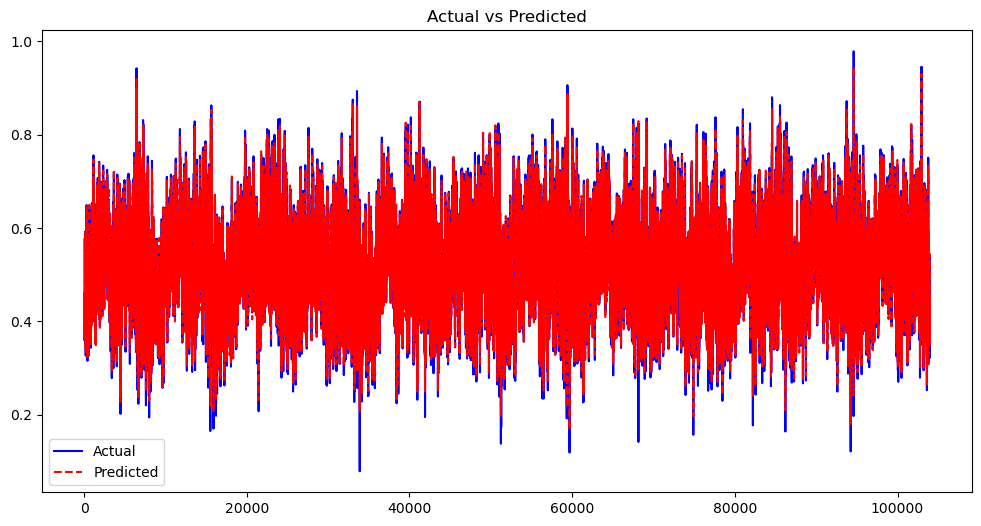

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [36]:
# Save the model
model.save('weather_prediction_lstm.h5')

In [37]:
# Save the model in the newer .keras format
model.save('weather_prediction_lstm.keras')

In [38]:
# Save the model in the newer .keras format
model.save('weather_prediction_lstm.keras')

# Check if the model is saved successfully
import os

if os.path.exists('weather_prediction_lstm.keras'):
    print("Model saved successfully!")
else:
    print("There was an issue saving the model.")

Model saved successfully!


In [1]:
import tensorflow as tf

def check_model(saved_model_path):
    """
    Function to load and check the saved model.
    
    Args:
    saved_model_path (str): Path to the saved model.
    
    Returns:
    model (tf.keras.Model): Loaded Keras model.
    """
    try:
        # Try loading the model
        model = tf.keras.models.load_model(saved_model_path)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Call the function to check if the model is loaded correctly
loaded_model = check_model('weather_prediction_lstm.keras')

# You can now proceed to use 'loaded_model' for predictions or further testing.

Model loaded successfully!


C:\Users\alok3\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Predictions shape: (1, 1)
Predictions: [[0.13492435]]
Predicted Safety Status: Safe


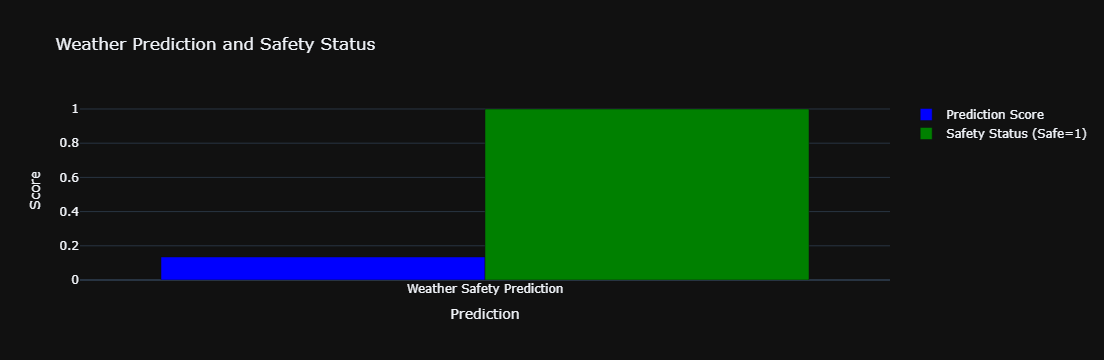

In [15]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

def predict_weather(wind_u10, temperature_t2m, precipitation_tp):
    # Load the pre-trained model
    model = load_model('weather_prediction_lstm.keras')

    # Define the scaler used for training the model (dummy scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Convert inputs
    inputs = np.array([wind_u10, temperature_t2m, precipitation_tp]).reshape(1, 1, -1)

    # Pad to match model's expected input shape (5 timesteps, 11 features)
    padded_inputs = np.pad(inputs, ((0, 0), (0, 4), (0, 8)), mode='constant')

    # Scale
    inputs_scaled = scaler.fit_transform(padded_inputs.reshape(-1, 1)).reshape(padded_inputs.shape)

    # Predict
    predictions = model.predict(inputs_scaled)
    print(f"Predictions shape: {predictions.shape}")
    print(f"Predictions: {predictions}")

    # Flatten predictions
    prediction = predictions.flatten()[0]

    # Classify prediction
    def classify_prediction(prediction):
        # You can design your own thresholds here
        if prediction < 0.3:
            status = 'Safe'
        elif 0.3 <= prediction < 0.7:
            status = 'Not Safe'
        else:
            status = 'Danger'
        return status

    status = classify_prediction(prediction)

    # Print the result
    print(f"Predicted Safety Status: {status}")

    # Display the predictions graphically
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=["Weather Safety Prediction"],
        y=[prediction],
        name='Prediction Score',
        marker_color='blue'
    ))

    fig.add_trace(go.Bar(
        x=["Weather Safety Prediction"],
        y=[1 if status == 'Safe' else 0],
        name='Safety Status (Safe=1)',
        marker_color='green'
    ))

    fig.update_layout(
        title="Weather Prediction and Safety Status",
        xaxis_title="Prediction",
        yaxis_title="Score",
        barmode="group",
        template="plotly_dark"
    )

    fig.show()

# Example usage
predict_weather(3.0, 29.0, 2.0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
Predictions shape: (1, 1)
Prediction value: 0.1215

🛫 Aviation Weather Risk Assessment:
   → Risk Status: Safe for Flight
   → Based on Inputs - Wind: 5.0 m/s, Temperature: 290.0 K, Precipitation: 2.0 mm


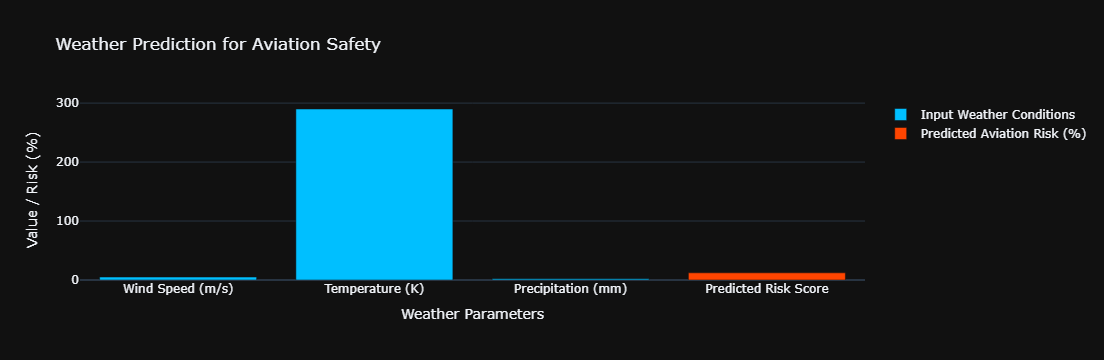

In [16]:
# Weather Prediction for Aviation Safety
# Hackathon Project - SpaceTech and Aerospace Track

import numpy as np
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

def predict_weather_for_aviation(wind_u10, temperature_t2m, precipitation_tp):
    """
    Predict extreme weather risk for aviation using a pre-trained LSTM model.
    Classify the conditions into Safe, Caution, or Danger for flight safety.
    """

    # Load the pre-trained deep learning model
    model = load_model('weather_prediction_lstm.keras')

    # Define MinMaxScaler (assumed to be used during model training)
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Prepare the input: reshape to (batch_size, time_steps, features)
    inputs = np.array([wind_u10, temperature_t2m, precipitation_tp]).reshape(1, 1, -1)

    # Pad input to match expected shape: (1, 5 timesteps, 11 features)
    padded_inputs = np.pad(inputs, ((0, 0), (0, 4), (0, 8)), mode='constant')

    # Scale input features
    inputs_scaled = scaler.fit_transform(padded_inputs.reshape(-1, 1)).reshape(padded_inputs.shape)

    # Predict using the LSTM model
    predictions = model.predict(inputs_scaled)
    
    print(f"Predictions shape: {predictions.shape}")
    print(f"Prediction value: {predictions.flatten()[0]:.4f}")

    # Extract prediction value
    prediction_score = predictions.flatten()[0]

    # Define risk classification based on prediction score
    def classify_risk(score):
        """
        Classify the weather risk for aviation based on prediction score.
        """
        if score < 0.3:
            return 'Safe for Flight'
        elif 0.3 <= score < 0.7:
            return 'Caution: Monitor Conditions'
        else:
            return 'Danger: Avoid Flight'

    # Get risk status
    aviation_risk_status = classify_risk(prediction_score)

    # Display the classification
    print("\n🛫 Aviation Weather Risk Assessment:")
    print(f"   → Risk Status: {aviation_risk_status}")
    print(f"   → Based on Inputs - Wind: {wind_u10} m/s, Temperature: {temperature_t2m} K, Precipitation: {precipitation_tp} mm")

    # Visualization
    fig = go.Figure()

    # Input conditions
    fig.add_trace(go.Bar(
        x=["Wind Speed (m/s)", "Temperature (K)", "Precipitation (mm)"],
        y=[wind_u10, temperature_t2m, precipitation_tp],
        name='Input Weather Conditions',
        marker_color='deepskyblue'
    ))

    # Risk Prediction Score
    fig.add_trace(go.Bar(
        x=["Predicted Risk Score"],
        y=[prediction_score * 100],  # show as percentage
        name='Predicted Aviation Risk (%)',
        marker_color='orangered'
    ))

    fig.update_layout(
        title="Weather Prediction for Aviation Safety",
        xaxis_title="Weather Parameters",
        yaxis_title="Value / Risk (%)",
        barmode="group",
        template="plotly_dark",
        height=600
    )

    fig.show()

# Example: Test the function with real values
predict_weather_for_aviation(5.0, 290.0, 2.0)


In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('A5125500445.csv')

In [3]:
data

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA2,GA3,GD1,GD2,GD3,MA1,MW1,OC1,REM,EQD
0,A5125500445,2025-01-01T05:15:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10190,5,10149,5",NaN,NaN,MET08312/31/24 23:15:02 METAR KDYA 010515Z 330...,R01 00817TMP028
1,A5125500445,2025-01-01T05:35:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10193,5,10152,5",NaN,NaN,MET08312/31/24 23:35:02 METAR KDYA 010535Z 330...,NaN
2,A5125500445,2025-01-01T05:55:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10193,5,10152,5",NaN,NaN,MET10512/31/24 23:55:02 METAR KDYA 010555Z 320...,NaN
3,A5125500445,2025-01-01T06:15:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10196,5,10155,5",NaN,NaN,MET08301/01/25 00:15:02 METAR KDYA 010615Z 290...,NaN
4,A5125500445,2025-01-01T06:35:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10200,5,10159,5",NaN,NaN,MET08301/01/25 00:35:02 METAR KDYA 010635Z 300...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,A5125500445,2025-04-25T06:35:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10186,5,10145,5",NaN,NaN,MET08304/25/25 00:35:01 METAR KDYA 250635Z 000...,NaN
6782,A5125500445,2025-04-25T06:55:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10183,5,10142,5",NaN,NaN,MET08304/25/25 00:55:01 METAR KDYA 250655Z 000...,NaN
6783,A5125500445,2025-04-25T07:15:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10183,5,10142,5",NaN,NaN,MET08304/25/25 01:15:01 METAR KDYA 250715Z 000...,NaN
6784,A5125500445,2025-04-25T07:35:00,6,32.46383,-87.95405,34.1,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",FM-15,KDYA,V020,...,NaN,NaN,"0,99,1,+99999,9,9",NaN,NaN,"10179,5,10139,5",NaN,NaN,MET08304/25/25 01:35:01 METAR KDYA 250735Z 150...,NaN


In [4]:
print(data.columns)

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AU1',
       'AW1', 'GA1', 'GA2', 'GA3', 'GD1', 'GD2', 'GD3', 'MA1', 'MW1', 'OC1',
       'REM', 'EQD'],
      dtype='object')


### Column	Description
### STATION	Station identifier (WMO/ICAO code or custom ID)
### DATE	Timestamp of the observation (usually UTC)
### SOURCE	Data source (e.g., METAR, SYNOP)
### LATITUDE	Station latitude
### LONGITUDE	Station longitude
#### ELEVATION	Station elevation above sea level (in meters)
### NAME	Station name
### REPORT_TYPE	Type of weather report (e.g., FM-12, FM-15)
#### CALL_SIGN	Station call sign (radio ID)
#### QUALITY_CONTROL	Quality control flags or method applied
#### WND	Wind data (direction, speed, type, etc.)
### CIG	Ceiling (cloud height)
### VIS	Visibility
### TMP	Air temperature (usually in tenths of °C)
#### DEW	Dew point temperature
### SLP	Sea level pressure
### AT1–AT5	Additional temperature readings or atmospheric variables (instrument-specific)
### AU1, AW1	Possibly cloud amount/height or weather phenomena
### GA1–GA3	Ground or surface condition indicators
### GD1–GD3	Ground data (possibly snow depth, ground temp, etc.)
### MA1	Miscellaneous atmospheric measurement
### MW1	Meteorological wind-related parameter
#### OC1	Oceanographic condition (if near coastal station)
#### REM	Remarks or notes (e.g., automated/manual, sensor flags)
### EQD	Earthquake data or event quality descriptor (rare)

# comparision both dataset 
# ✅ 1. ERA5 Single-Level Variables (Copernicus CDS) These are reanalysis data at global scale, hourly resolution:
# ✅ 2. Station-Based Observational Dataset (likely from NOAA/ISD)

✅ 1. ERA5 Single-Level Variables (Copernicus CDS)
These are reanalysis data at global scale, hourly resolution:


Column Name	Description
valid_time	Timestamp (UTC)
wind_u10 (east-west component)	Zonal wind at 10m above surface
wind_v10 (north-south component)	Meridional wind at 10m above surface
dew_point_2m (K)	Dew point temperature at 2m
temperature_2m (K)	Air temperature at 2m
mean_sea_level_pressure (Pa)	MSL pressure
sea_surface_temperature (K)	SST (useful near coast or ocean)
surface_pressure (Pa)	Actual surface pressure
total_precipitation (mm)	Cumulative rainfall/snowfall
mean_wave_direction (°)	Direction of waves (for aviation over oceans)
mean_wave_period (s)	Average time between waves
significant_wave_height (m)	Average of highest third of waves
These are ideal for modeling weather across regions, for example:

Regional storm modeling

Wind and turbulence prediction

Training a global model

✅ 2. Station-Based Observational Dataset (likely from NOAA/ISD)
This includes real-world measurements from airport/station sensors, like:

WND: actual observed wind speed & direction

VIS: visibility

CIG: ceiling (cloud base)

TMP, DEW, SLP: core weather features

These are best for localized aviation models, like:

Runway visibility prediction

Wind shear alerts

Take-off/landing condition forecasts

🔍 Which One Should You Use for Aviation Weather ML?

Use Case	Best Dataset	Why

Real-time runway condition	Station-based (NOAA-style)	Real and hyperlocal

General ML model training	ERA5 (CDS)	Complete, consistent, no missing values

Hybrid ML model (train on ERA5, fine-tune on station)	Both	Best for accuracy and generalization


🔧 Suggestion: Use ERA5 as input features, and station data as ground truth labels

For example:


Inputs: wind_u10, wind_v10, temperature_2m, pressure, dew_point_2m


Labels: WND, VIS, CIG, etc. from station data


This enables supervised learning, where you're teaching a model to map gridded ERA5 data to what actually happens at an airport.

